<a href="https://colab.research.google.com/github/EunjinAn/python_study/blob/main/Stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **LSTM** (Long Short term memory)

The problem of vanishing/exploding gradients of RNN model : 

* gradient vanishing : will be very closed to 0 and very tough to update. that means w is not change to effect the result.

* gradient exploding : if you can assume that the value of derivativation is above 1, it will be very large number and result in large change W.

In [ ]:
# import required libraries
import torch
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [ ]:
# import stock data from y_finace
data = pd.read_csv('GOOG.csv', index_col ='Date')

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-14,133.365494,136.166504,133.302002,135.300003,135.300003,26792000
2022-02-15,137.471497,137.899994,135.539505,136.425507,136.425507,26578000
2022-02-16,136.430496,137.945999,134.823654,137.487503,137.487503,25610000
2022-02-17,136.149994,136.839493,132.201996,132.308502,132.308502,30968000
2022-02-18,133.037506,133.824005,130.307053,130.467499,130.467499,31858000


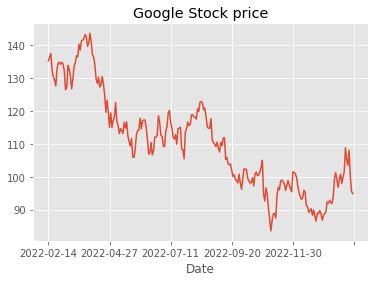

In [ ]:
plt.style.use('ggplot')

data['Close'].plot(label='CLOSE', title='Google Stock price')

In [ ]:
# X,y data
X = data.iloc[:, :-1]
y = data.iloc[:,5:6]

In [ ]:
X.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2022-02-14,133.365494,136.166504,133.302002,135.300003,135.300003
2022-02-15,137.471497,137.899994,135.539505,136.425507,136.425507
2022-02-16,136.430496,137.945999,134.823654,137.487503,137.487503
2022-02-17,136.149994,136.839493,132.201996,132.308502,132.308502
2022-02-18,133.037506,133.824005,130.307053,130.467499,130.467499


In [ ]:
y.head()

,Volume
Date,
2022-02-14,26792000
2022-02-15,26578000
2022-02-16,25610000
2022-02-17,30968000
2022-02-18,31858000


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()

X_ss = ss.fit_transform(X)
y_ss = ss.fit_transform(y)

In [ ]:
#first 200 for training

X_train = X_ss[:200, :]
X_test = X_ss[200:, :]

y_train = y_ss[:200, :]
y_test = y_ss[200:, :] 

In [ ]:
print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 

Training Shape (200, 5) (200, 1)
Testing Shape (50, 5) (50, 1)


In [ ]:
# Split the data into training and testing sets
train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

train_loader = DataLoader(train_data, batch_size=1, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1, shuffle=False)

In [ ]:
# Implement LSTM
# Initialize the LSTM model
# Define the input size, hidden size and number of outputs
input_size = 5
hidden_size = 30
output_size = 1
num_epochs= 10

# 1. Creating a LSTM model
# Define the LSTM model and Linear output fully connected layer
lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
fc = nn.Linear(hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(lstm.parameters(), lr=0.0001)

In [ ]:
# Combine the parameters of the LSTM layer and linear layer
params = list(lstm.parameters()) + list(fc.parameters())

# Print the number of parameters
print("Number of parameters:", sum(p.numel() for p in params))

# Print the shapes of the parameters
for name, param in lstm.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print("Weight: ", param.data)

Number of parameters: 4471
Name:  weight_ih_l0
shape:  torch.Size([120, 5])
Weight:  tensor([[ 0.1364,  0.0438, -0.1395,  0.0982,  0.0221],
        [-0.1817,  0.1665,  0.1055, -0.0146,  0.1392],
        [-0.0275, -0.0798,  0.1609, -0.0377,  0.0439],
        [-0.1014, -0.1570,  0.0005,  0.1760, -0.1803],
        [-0.0538, -0.1682,  0.0853,  0.1068, -0.0765],
        [ 0.0708,  0.0772, -0.1178, -0.0715, -0.0577],
        [-0.0872, -0.0327, -0.1567,  0.0144, -0.1769],
        [-0.0088,  0.1043,  0.0668,  0.0300, -0.0020],
        [-0.1619,  0.0601,  0.0842, -0.0984,  0.1016],
        [-0.1807, -0.0603,  0.1393, -0.1789, -0.1417],
        [ 0.0174, -0.0229, -0.1295, -0.0099, -0.0867],
        [-0.1660,  0.1165,  0.0098,  0.1060, -0.0653],
        [ 0.0729, -0.1264, -0.0101,  0.0238, -0.0121],
        [ 0.0643,  0.1656, -0.1462, -0.0845, -0.1664],
        [ 0.0190,  0.0763,  0.1114,  0.0895, -0.0069],
        [ 0.0489,  0.0480,  0.0603, -0.0894,  0.1273],
        [-0.0193,  0.1495,  0.1092,

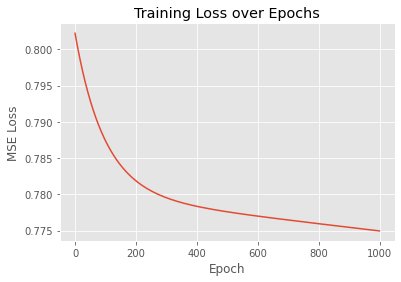

Test MSE: 1.8553462322397507


In [ ]:
# Initializing Hyperparameters
num_epochs = 1000
train_losses = []
test_losses = []

# Loop over the number of epochs
for epoch in range(num_epochs):
    train_loss = 0

    # Initialize the hidden state and the cell state
    # The hidden state and the cell state reset to zero for every epoch
    hs = torch.zeros(1, hidden_size)
    cs = torch.zeros(1, hidden_size)
    
    # Get the input and target at position i
    for i, (data, label) in enumerate(train_loader):
        
        hidden = (hs, cs)
        # Run the forward pass
        output, hidden = lstm(data.float(), hidden)
        output = fc(hidden[-1])
        
        # 2. Network Evaluation
        loss = criterion(output, label.float())
        hs = hs.detach()
        cs = cs.detach()

        # 3. Gradient Calculation
        loss.backward()

        # 4. Back Propagation
        optimizer.step()
        optimizer.zero_grad()

        train_loss += loss.item()

    # Calculate the average training loss
    train_loss = train_loss / len(train_loader)
    train_losses.append(train_loss)

# Plot the MSE loss for each epoch
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss over Epochs')
plt.show()

# Evaluate the LSTM model
mse = 0

with torch.no_grad():
    # Initialize the hidden state and the cell state
    # The hidden state and the cell state reset to zero for every epoch
    hs = torch.zeros(1, hidden_size)
    cs = torch.zeros(1, hidden_size)

    for data, label in test_loader:
        hidden = (hs, cs)
        output, hidden = lstm(data.float(), hidden)
        output = fc(hidden[-1])
        hs = hs.detach()
        cs = cs.detach()

        mse += ((output - label)**2).mean().item()

mse /= len(test_loader)
print('Test MSE: {}'.format(mse))

In [ ]:
output_list = []
for i, (data, label) in enumerate(test_loader):
        
    # Initialize the hidden state and the cell state
    # The hidden state and the cell state reset to zero for every epoch
    hidden = (torch.zeros(data.size(0), hidden_size),
                  torch.zeros(data.size(0), hidden_size))

    # Run the forward pass
    output, hidden = lstm(data.float(), hidden)
    output = fc(hidden[-1])
    output_list.append(output.detach().numpy()[0][0])
    
for i, (data, label) in enumerate(train_loader):
        
    # Initialize the hidden state and the cell state
    # The hidden state and the cell state reset to zero for every epoch
    hidden = (torch.zeros(data.size(0), hidden_size),
                  torch.zeros(data.size(0), hidden_size))

    # Run the forward pass
    output, hidden = lstm(data.float(), hidden)
    output = fc(hidden[-1])
    output_list.append(output.detach().numpy()[0][0])

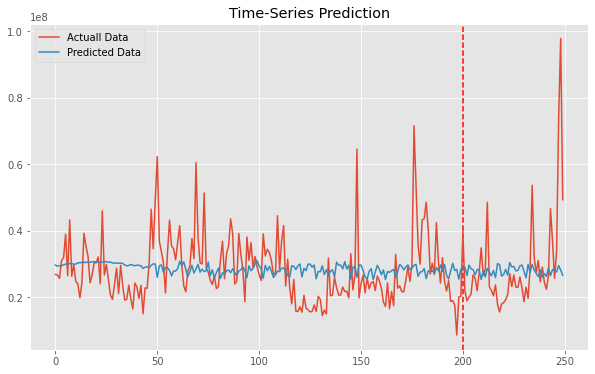

In [ ]:
# train_predict = lstm(X_ss)#forward pass
# data_predict = train_predict.data.numpy() #numpy conversion
dataY_plot = y.Volume.values
# data_predict = output_list

data_predict = ss.inverse_transform([output_list]) #reverse transformation
# dataY_plot = ss.inverse_transform(dataY_plot)
plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=200, c='r', linestyle='--') #size of the training set

plt.plot(dataY_plot, label='Actuall Data') #actual plot
plt.plot(data_predict[0], label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

### Find Hyperparameter!

In [ ]:
# find the Hyperparameter!!!
# change the hyperparameter!
# - hidden size = 3 to 6
# - num_epochs = 10 to 50

input_size = 5
hidden_size = 6
output_size = 1
num_epochs= 50

# 1. Creating a LSTM model
# Define the LSTM model and Linear output fully connected layer
lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
fc = nn.Linear(hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(lstm.parameters(), lr=0.001)

In [ ]:
# Combine the parameters of the LSTM layer and linear layer
params = list(lstm.parameters()) + list(fc.parameters())

# Print the number of parameters
print("Number of parameters:", sum(p.numel() for p in params))

# Print the shapes of the parameters
for name, param in lstm.named_parameters():
    print("Name: ", name)
    print("shape: ", param.shape)
    print("Weight: ", param.data)

Number of parameters: 319
Name:  weight_ih_l0
shape:  torch.Size([24, 5])
Weight:  tensor([[-0.3837, -0.3652, -0.3152,  0.2482,  0.2282],
        [ 0.3956,  0.3561,  0.1694,  0.0968,  0.1343],
        [-0.3460,  0.0319, -0.1078,  0.3914,  0.3417],
        [ 0.0707,  0.0098,  0.1131,  0.2656, -0.2321],
        [ 0.3624,  0.0310,  0.2049,  0.2777,  0.1589],
        [-0.3853, -0.2649,  0.3771, -0.3178, -0.1162],
        [ 0.3849, -0.1219, -0.0865, -0.1015, -0.3117],
        [ 0.2617,  0.2209,  0.1291,  0.0282,  0.1932],
        [-0.0129, -0.1393,  0.0729,  0.2437,  0.2195],
        [ 0.3404,  0.1042,  0.1175,  0.4019, -0.2629],
        [ 0.0674, -0.1644, -0.0582,  0.0868, -0.2431],
        [-0.2603,  0.0223,  0.2447,  0.1358, -0.3883],
        [-0.0914, -0.0419, -0.3167,  0.0810,  0.3549],
        [-0.2287,  0.2517, -0.2763, -0.0645, -0.0845],
        [ 0.0442,  0.3141,  0.0998, -0.1914, -0.0131],
        [ 0.1164,  0.1993, -0.3458,  0.3803,  0.0451],
        [ 0.0504,  0.0707, -0.1385,  

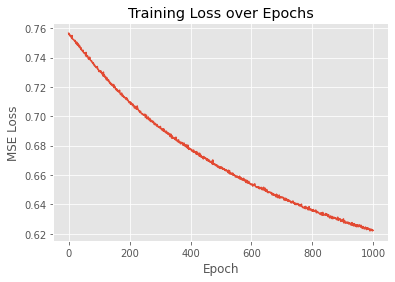

Test MSE: 1.6315058119791235


In [ ]:
# Initializing Hyperparameters
num_epochs = 1000
train_losses = []
test_losses = []

# Loop over the number of epochs
for epoch in range(num_epochs):
    train_loss = 0

    # Initialize the hidden state and the cell state
    # The hidden state and the cell state reset to zero for every epoch
    hs = torch.zeros(1, hidden_size)
    cs = torch.zeros(1, hidden_size)
    
    # Get the input and target at position i
    for i, (data, label) in enumerate(train_loader):
        
        hidden = (hs, cs)
        # Run the forward pass
        output, hidden = lstm(data.float(), hidden)
        output = fc(hidden[-1])
        
        # 2. Network Evaluation
        loss = criterion(output, label.float())
        hs = hs.detach()
        cs = cs.detach()

        # 3. Gradient Calculation
        loss.backward()

        # 4. Back Propagation
        optimizer.step()
        optimizer.zero_grad()

        train_loss += loss.item()

    # Calculate the average training loss
    train_loss = train_loss / len(train_loader)
    train_losses.append(train_loss)

# Plot the MSE loss for each epoch
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss over Epochs')
plt.show()

# Evaluate the LSTM model
mse = 0

with torch.no_grad():
    # Initialize the hidden state and the cell state
    # The hidden state and the cell state reset to zero for every epoch
    hs = torch.zeros(1, hidden_size)
    cs = torch.zeros(1, hidden_size)

    for data, label in test_loader:
        hidden = (hs, cs)
        output, hidden = lstm(data.float(), hidden)
        output = fc(hidden[-1])
        hs = hs.detach()
        cs = cs.detach()

        mse += ((output - label)**2).mean().item()

mse /= len(test_loader)
print('Test MSE: {}'.format(mse))

In [ ]:
output_list = []
for i, (data, label) in enumerate(test_loader):
        
    # Initialize the hidden state and the cell state
    # The hidden state and the cell state reset to zero for every epoch
    hidden = (torch.zeros(data.size(0), hidden_size),
                  torch.zeros(data.size(0), hidden_size))

    # Run the forward pass
    output, hidden = lstm(data.float(), hidden)
    output = fc(hidden[-1])
    output_list.append(output.detach().numpy()[0][0])
    
for i, (data, label) in enumerate(train_loader):
        
    # Initialize the hidden state and the cell state
    # The hidden state and the cell state reset to zero for every epoch
    hidden = (torch.zeros(data.size(0), hidden_size),
                  torch.zeros(data.size(0), hidden_size))

    # Run the forward pass
    output, hidden = lstm(data.float(), hidden)
    output = fc(hidden[-1])
    output_list.append(output.detach().numpy()[0][0])

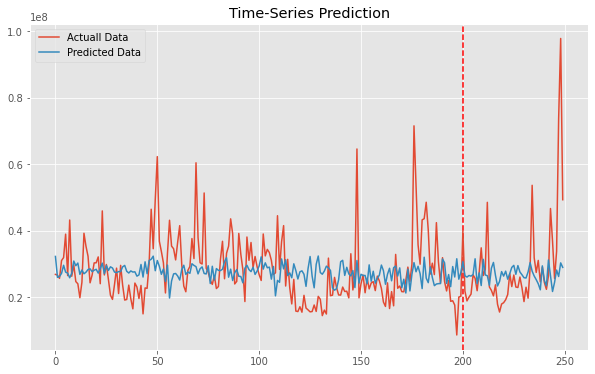

In [ ]:
# train_predict = lstm(X_ss)#forward pass
# data_predict = train_predict.data.numpy() #numpy conversion
dataY_plot = y.Volume.values
# data_predict = output_list

data_predict = ss.inverse_transform([output_list]) #reverse transformation
# dataY_plot = ss.inverse_transform(dataY_plot)
plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=200, c='r', linestyle='--') #size of the training set

plt.plot(dataY_plot, label='Actuall Data') #actual plot
plt.plot(data_predict[0], label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

In [ ]:
# Save the trained RNN model
torch.save(lstm.state_dict(), 'lstm.pt')

# Load the model
rnn = nn.LSTM(input_size, hidden_size, batch_first=True)
rnn.load_state_dict(torch.load('lstm.pt'))